# Case Study

Below mentioned are the steps to be followed:

<b>Part 1</b>
1. Load the data
2. Understand and Viz the data
    - Missing value treatment
    - EDA
3. Data Preparation
    - Removing Outliers and uneccessary columns
    - Train Test Split
    - Categorical variable treatment on X_train
    - Standardizing numerical variables in X_train
4. Training the Model
5. Prediction
    - Categorical variable treatment on X_test
    - Standardizing numerical variables in X_test
    - Making Predictions
6. Evaluation

<b>Part 2</b> Automatic Feature Elimination using RFE

<b>Part 3</b> Principal Component Analysis

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Step 1: Load the data

In [3]:
df = pd.read_csv("adult.csv")

### Step 2: Understand and Viz the data

In [4]:
# Looking at the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
# Dimensionality check
df.shape

(48842, 15)

In [6]:
# Column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
# Statistical analysis
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Observations :

In [8]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df.replace('?', np.nan, inplace=True)
df.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
# Percentage of missing values.
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.73
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.75
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     1.75
income             0.00
dtype: float64

In [12]:
df = df.loc[df['native-country'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.00
workclass          5.74
fnlwgt             0.00
education          0.00
educational-num    0.00
marital-status     0.00
occupation         5.76
relationship       0.00
race               0.00
gender             0.00
capital-gain       0.00
capital-loss       0.00
hours-per-week     0.00
native-country     0.00
income             0.00
dtype: float64

In [13]:
df = df.loc[df['occupation'].notnull(), :]
round(df.isnull().sum() * 100 / len(df.index), 2)

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income             0.0
dtype: float64

In [14]:
df.shape

(45222, 15)

In [15]:
# Percentage of rows lost in data cleaning.

(48842 - len(df.index)) * 100 / 48842

7.411653904426518

<b>So, we have lost 7.41% of the rows from the dataframe. This is fine considering that we have more than 45,000 datapoints in the dataframe.

In [16]:
num_attributes = df.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B228C8B08>,
      dtype=object)

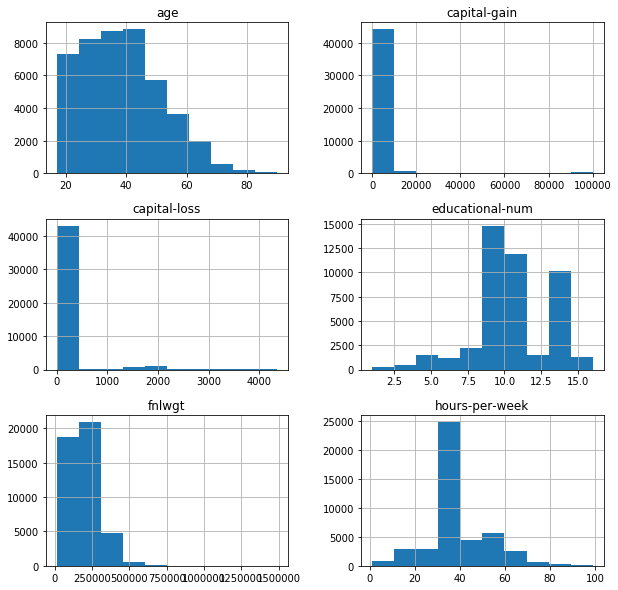

In [17]:
num_attributes.hist(figsize=(10,10))

In [18]:
cat_attributes = df.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


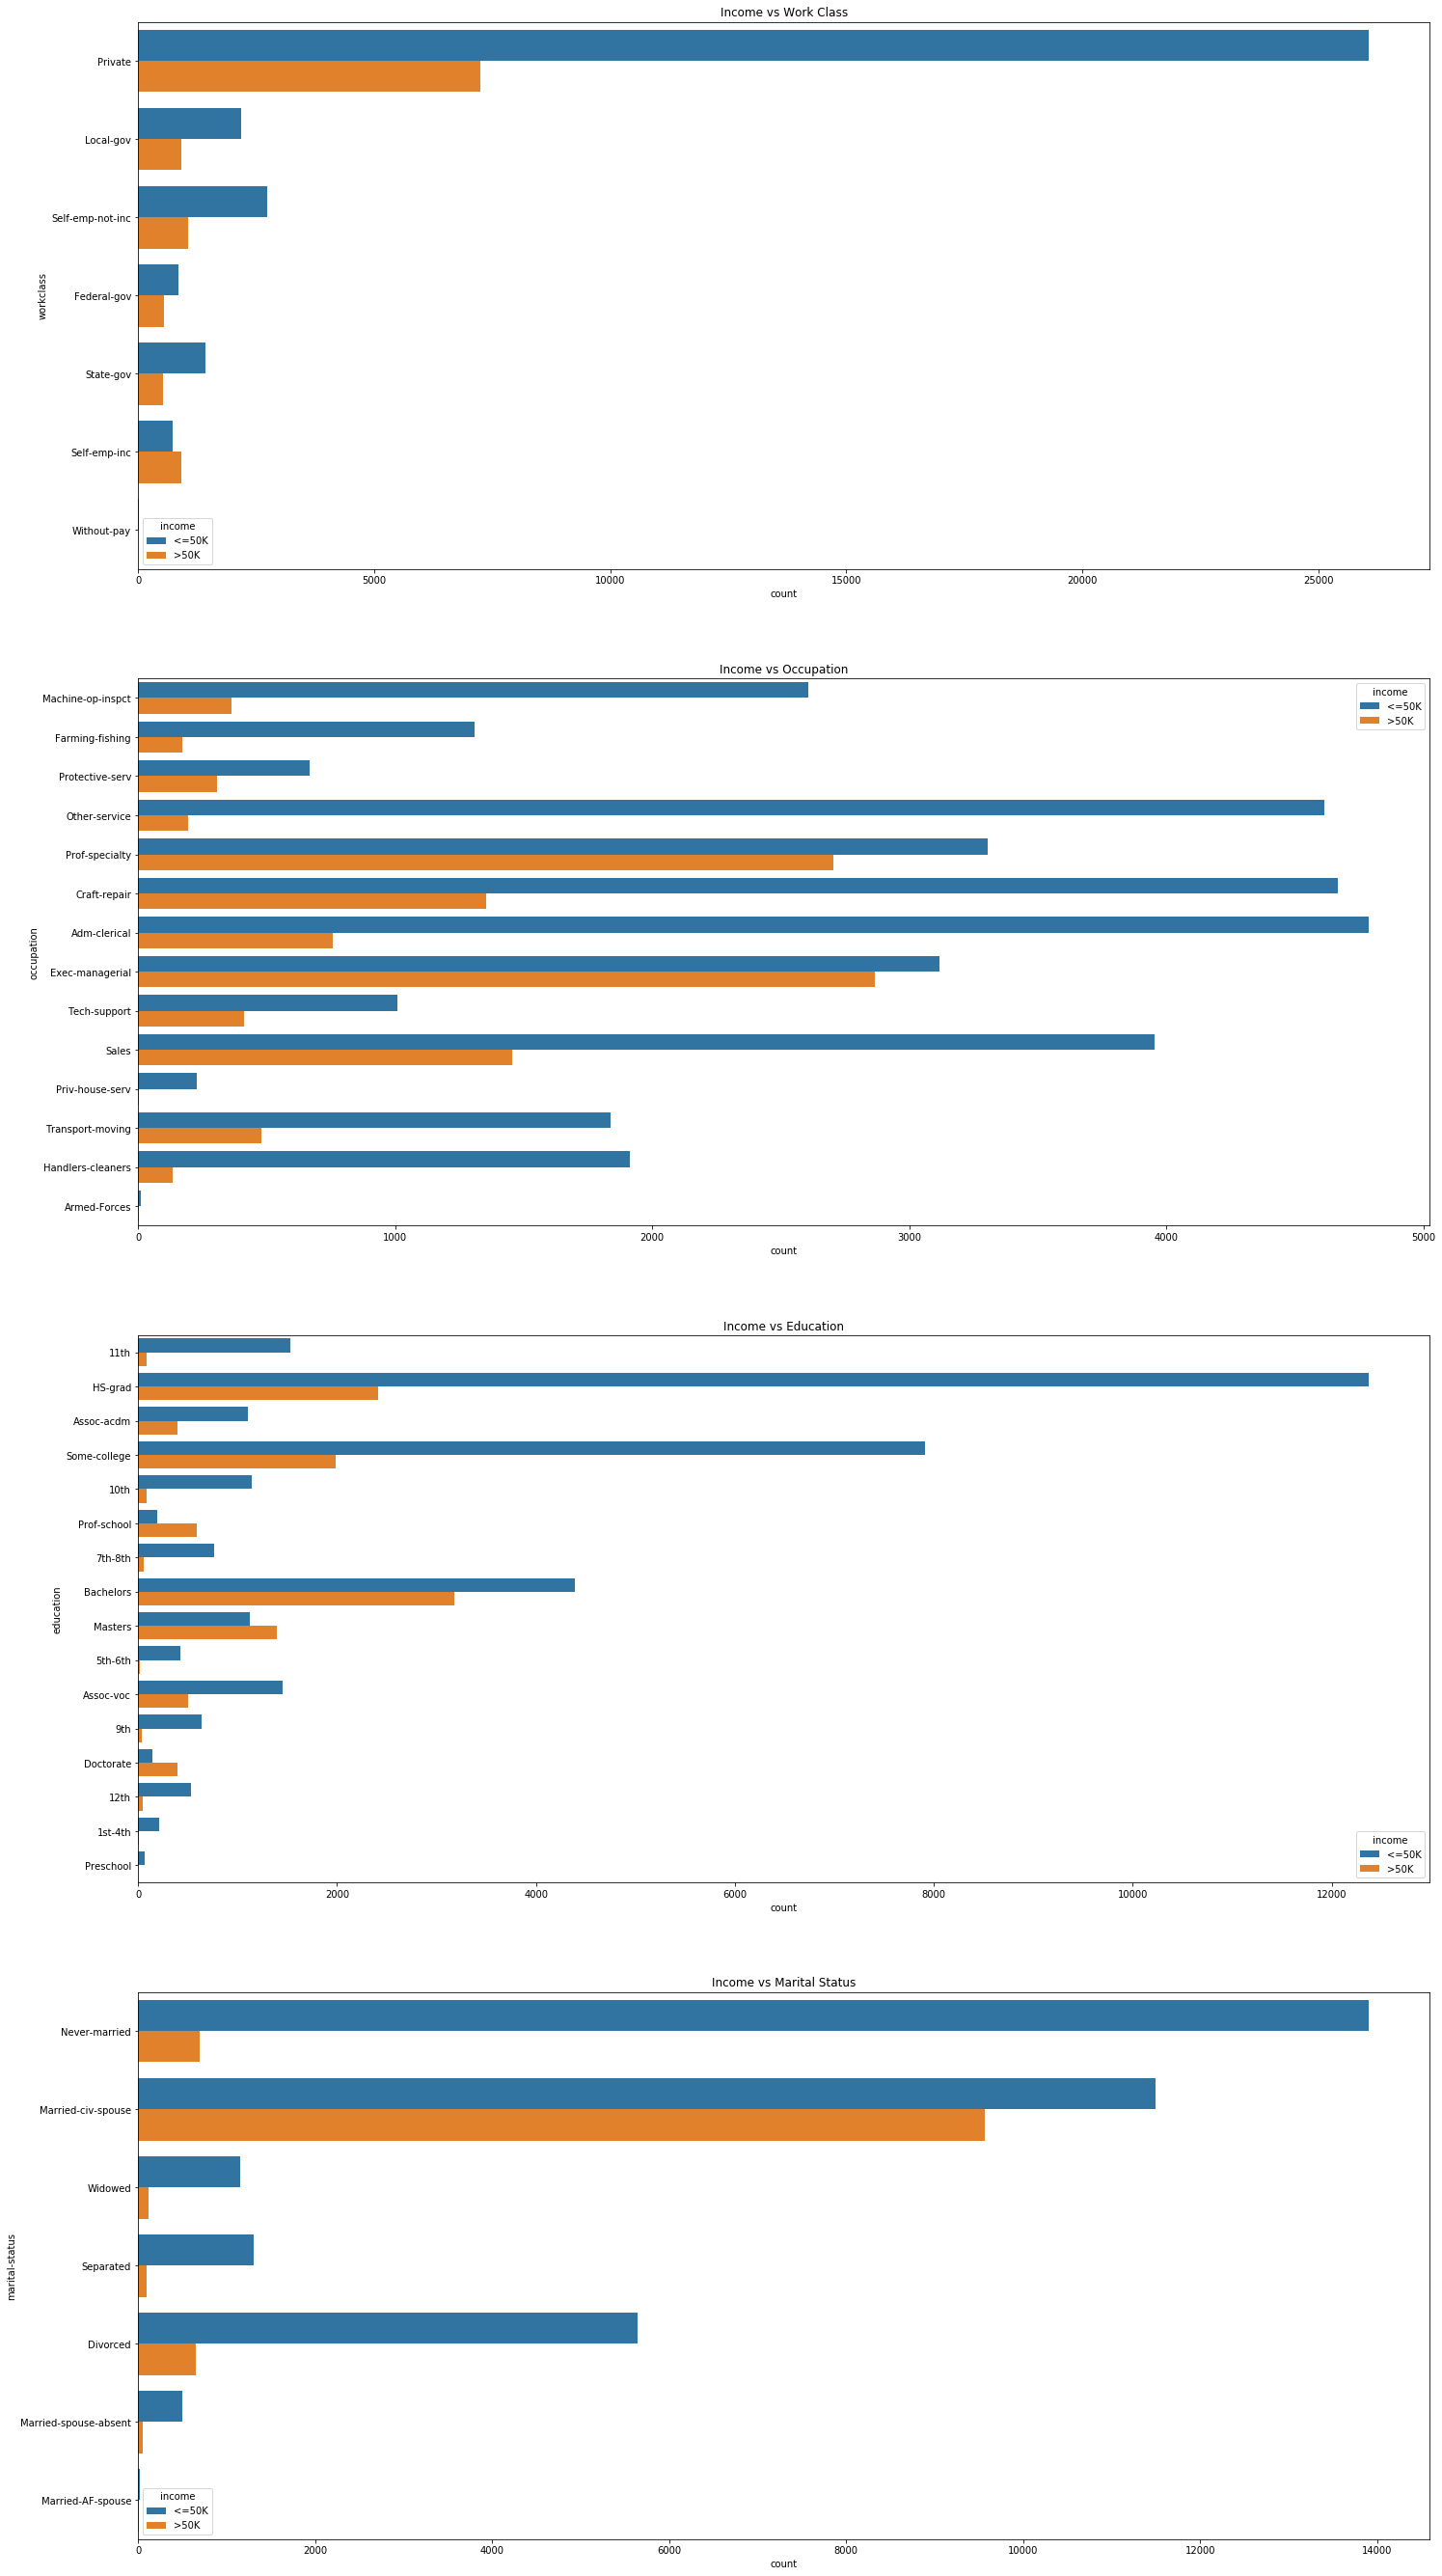

In [19]:
plt.figure(figsize=(24, 48))

plt.subplot(411)
sns.countplot(y='workclass', hue='income', data = cat_attributes)
plt.title('Income vs Work Class')

plt.subplot(412)
sns.countplot(y='occupation', hue='income', data = cat_attributes)
plt.title('Income vs Occupation')

plt.subplot(413)
sns.countplot(y='education', hue='income', data=cat_attributes)
plt.title('Income vs Education')

plt.subplot(414)
sns.countplot(y='marital-status', hue='income', data=cat_attributes)
plt.title('Income vs Marital Status')

plt.show()

In [20]:
df['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [21]:
df['income'].value_counts(normalize = True)

<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64

In [22]:
# Percentage of working men and women

df['gender'].value_counts(normalize=True)

Male      0.675048
Female    0.324952
Name: gender, dtype: float64

In [23]:
df['income_category'] = "null"
df.loc[df['income'] == '>50K', ['income_category']] = 'high income'
df.loc[df['income'] == '<=50K', ['income_category']] = 'low income'
df.loc[:, 'income_category'].head()

0     low income
1     low income
2    high income
3    high income
5     low income
Name: income_category, dtype: object

In [110]:
# Now I am interested in looking at the racewise distribution of income.

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race                               
<=50K  Amer-Indian-Eskimo              382
       Asian-Pac-Islander              929
       Black                          3692
       Other                           308
       White                         28669
>50K   Amer-Indian-Eskimo               53
       Asian-Pac-Islander              358
       Black                           524
       Other                            42
       White                          9990

In [25]:
# Let us also look into the racewise gender distibution of income

racewise_income_dist = df.pivot_table(values=['income_category'], 
                                      index=['income', 'race', 'gender'], 
                                      aggfunc = 'count')
racewise_income_dist

income_category
income race               gender                 
<=50K  Amer-Indian-Eskimo Female              152
                          Male                230
       Asian-Pac-Islander Female              371
                          Male                563
       Black              Female             1958
                          Male               1736
       Other              Female              117
                          Male                191
       White              Female            10428
                          Male              18268
>50K   Amer-Indian-Eskimo Female               14
                          Male                 39
       Asian-Pac-Islander Female               65
                          Male                304
       Black              Female              126
                          Male                408
       Other              Female                9
                          Male                 36
       White              Female             1455
                          Male               8752

<b>From the above table, you can see that the difference in the number of men and women earning salary above 50,000 is huge across all races. Interestingly, more black females earn a salary of USD 50,000 or less compared to black men. 

In [26]:
df.pivot_table(values=['income'], index=['workclass', 'gender'], aggfunc='count')

income
workclass        gender        
Federal-gov      Female     445
                 Male       961
Local-gov        Female    1244
                 Male      1856
Private          Female   11428
                 Male     21879
Self-emp-inc     Female     199
                 Male      1447
Self-emp-not-inc Female     617
                 Male      3179
State-gov        Female     755
                 Male      1191
Without-pay      Female       7
                 Male        14

<b> Private sector provides most jobs

In [27]:
# Relationship-wise salary distribution for low income group

relationship_wise_low_income = df.loc[df['income'] == '<=50K', :].pivot_table(values=['income'], index=['relationship'], aggfunc='count')
relationship_wise_low_income['percent'] = round(relationship_wise_low_income['income'] * 100 / relationship_wise_low_income['income'].sum(), 2)
relationship_wise_low_income

,income,percent
relationship,,
Husband,10159,29.87
Not-in-family,10474,30.79
Other-relative,1299,3.82
Own-child,6521,19.17
Unmarried,4486,13.19
Wife,1075,3.16


In [28]:
# Relationship-wise salary distribution for high income group

relationship_wise_high_income = df.loc[df['income'] == '>50K', :].pivot_table(values=['income'], index=['relationship'], aggfunc='count')
relationship_wise_high_income['percent'] = round(relationship_wise_high_income['income'] * 100 / relationship_wise_high_income['income'].sum(), 2)
relationship_wise_high_income

,income,percent
relationship,,
Husband,8507,75.90
Not-in-family,1228,10.96
Other-relative,50,0.45
Own-child,105,0.94
Unmarried,302,2.69
Wife,1016,9.06


<b>In the high income group, about 75% of people are husbands whereas in low income group, the percentage share is quite well distribted between husbands, own childs and people who are not a part of any family.

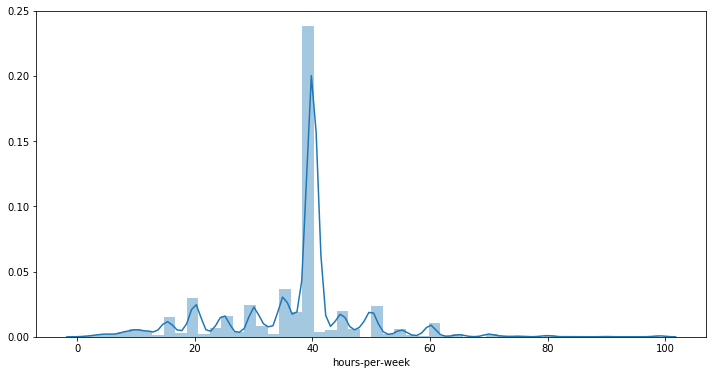

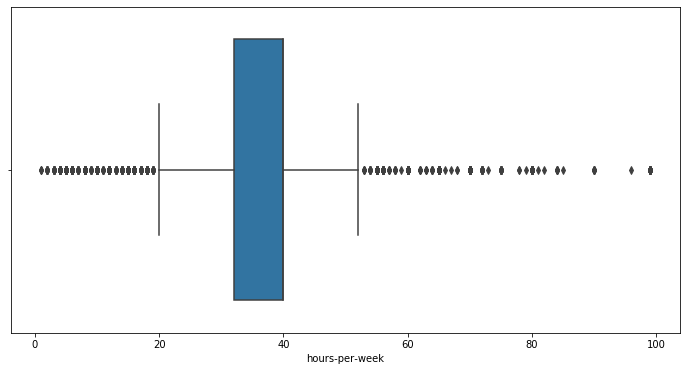

In [29]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_female = df.loc[df['gender'] == 'Female', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_female['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_female['hours-per-week'])
plt.show()

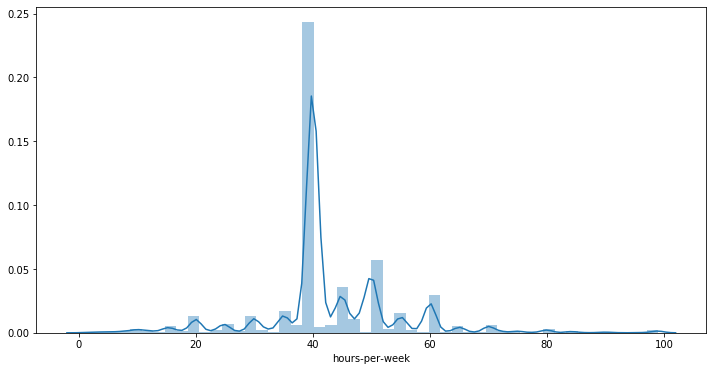

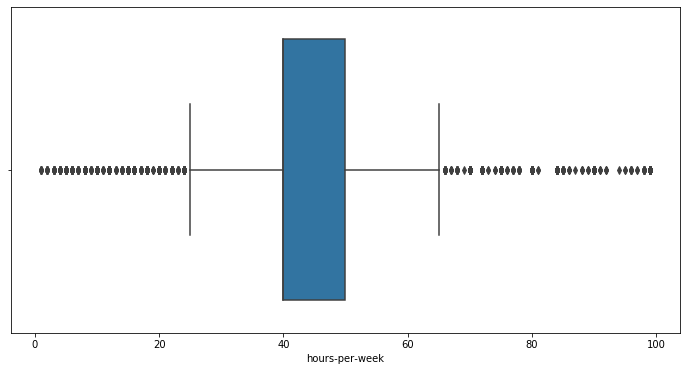

In [30]:
# Plotting distribution and box plots for the number of working hours for females.
working_hours_male = df.loc[df['gender'] == 'Male', ['hours-per-week']]

# Distribution plot
plt.figure(figsize=(12, 6))
sns.distplot(working_hours_male['hours-per-week'])
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(working_hours_male['hours-per-week'])
plt.show()

<b> There are lot of outliers in the 'hours-per-week' data both for males and females.

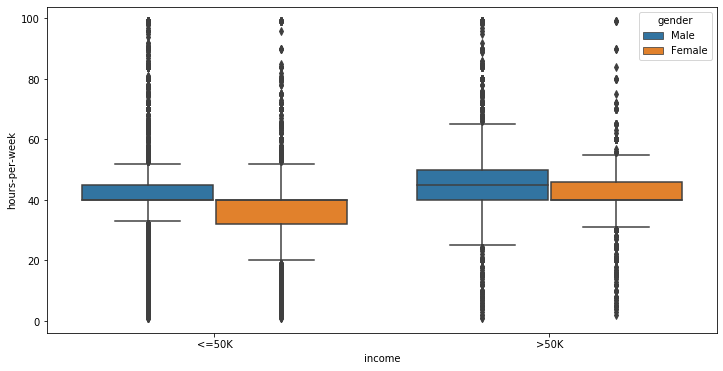

In [31]:
# Grouped boxplot for income, gender and number of hours per week.

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='hours-per-week', hue='gender')

<b>From the boxplot above, it can be concluded that men worked for few more hours than women in both the salary brackets.

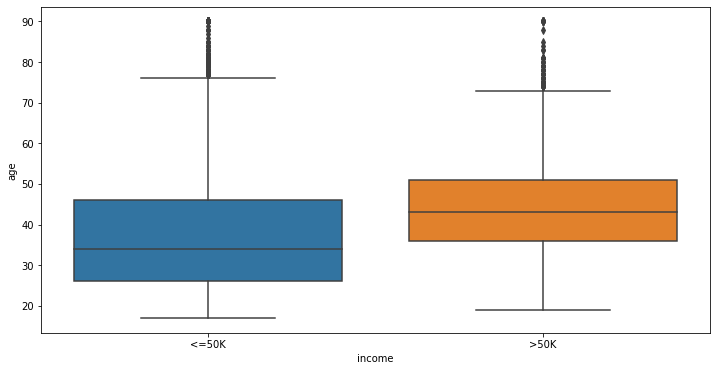

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='income', y='age')

### Step 3: Data Prepration

##### Removing outliers and unnecessary columns

In [33]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'income_category'],
      dtype='object')

In [34]:
print(f"Number of columns before deleting: {df.shape[1]}")

del_cols = ['fnlwgt','education']
df.drop(labels = del_cols, axis = 1, inplace = True)
print(f"Number of columns after deleting: {df.shape[1]}")

Number of columns before deleting: 16
Number of columns after deleting: 14


In [35]:
# drop rows with age 90
print("Number of observation before removing:", df.shape)
index_age = df[df['age'] == 90].index
df.drop(labels = index_age, axis = 0, inplace =True)
print("Number of observation after removing:", df.shape)

Number of observation before removing: (45222, 14)
Number of observation after removing: (45176, 14)


In [36]:
#drop rows with capital gain = 99999
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index
df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",df.shape)

Number of observation before removing: (45176, 14)
Number of observation after removing: (44947, 14)


##### Train Test Split

In [37]:
df.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income', 'income_category'],
      dtype='object')

In [38]:
X = df[['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country']]
y = df['income']

In [39]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 100)

##### Converting Categorical Variables to Dummy Variables

In [40]:
# creating dummy variables for categorical variables

# subset all categorical variables
df_categorical = X_train.select_dtypes(include=['object'])
df_categorical.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country
15746,Private,Never-married,Craft-repair,Own-child,White,Male,United-States
16255,Local-gov,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
10648,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
42978,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
33299,Self-emp-inc,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States


In [41]:
# convert categorical data into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
15746,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16255,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10648,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
42978,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
33299,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# drop categorical variables 
X_train = X_train.drop(list(df_categorical.columns), axis=1)
X_train.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
15746,18,9,0,0,40
16255,43,14,0,1902,50
10648,26,9,0,0,45
42978,49,9,0,1902,40
33299,42,14,0,0,60


In [43]:
# concat dummy variables with X_train
X_train = pd.concat([X_train, df_dummies], axis=1)
X_train.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
15746,18,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16255,43,14,0,1902,50,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10648,26,9,0,0,45,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42978,49,9,0,1902,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33299,42,14,0,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


##### Standardizing Numerical Columns

In [44]:
num_col = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [45]:
df_numerical = X_train.loc[:, num_col]

df_numerical.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
15746,18,9,0,0,40
16255,43,14,0,1902,50
10648,26,9,0,0,45
42978,49,9,0,1902,40
33299,42,14,0,0,60


In [46]:
X_train = X_train.drop(num_col, axis=1)
X_train.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
15746,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16255,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10648,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
42978,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
33299,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
# scaling the features
from sklearn.preprocessing import StandardScaler

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (i.e. the df is converted to a numpy array)

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), 
                         index = X_train.index)
df_scaled.columns = num_col
df_scaled.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
15746,-1.558965,-0.429107,-0.233823,-0.218777,-0.077287
16255,0.342053,1.530621,-0.233823,4.471102,0.756739
10648,-0.950639,-0.429107,-0.233823,-0.218777,0.339726
42978,0.798297,-0.429107,-0.233823,4.471102,-0.077287
33299,0.266012,1.530621,-0.233823,-0.218777,1.590766


In [48]:
# concat standardised variables with X_train
X_train = pd.concat([X_train, df_scaled], axis=1)
X_train.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num,capital-gain,capital-loss,hours-per-week
15746,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.558965,-0.429107,-0.233823,-0.218777,-0.077287
16255,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.342053,1.530621,-0.233823,4.471102,0.756739
10648,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,-0.950639,-0.429107,-0.233823,-0.218777,0.339726
42978,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.798297,-0.429107,-0.233823,4.471102,-0.077287
33299,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0.266012,1.530621,-0.233823,-0.218777,1.590766


##### Converting Class Label To Dummy Variable

In [49]:
y_train.head()

15746    <=50K
16255     >50K
10648    <=50K
42978    <=50K
33299     >50K
Name: income, dtype: object

In [50]:
y_train.shape

(31462,)

In [51]:
y_train = pd.get_dummies(y_train)
y_train.head()

,<=50K,>50K
15746,1,0
16255,0,1
10648,1,0
42978,1,0
33299,0,1


In [52]:
y_train = y_train.drop('>50K', axis = 1)
y_train.head()

,<=50K
15746,1
16255,0
10648,1
42978,1
33299,0


In [53]:
# Converting y_train to Series
# ML algos expect X_train as dataframe and y_train as Series

y_train = y_train.iloc[:,0]
y_train.head()

15746    1
16255    0
10648    1
42978    1
33299    0
Name: <=50K, dtype: uint8

### Step 4: Training the Model

In [54]:
from sklearn.linear_model import LogisticRegression

clf_logit = LogisticRegression()

clf_logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Step 5: Testing

In [55]:
X_test.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
24228,17,Private,6,Never-married,Tech-support,Own-child,White,Male,0,0,10,United-States
17272,41,Private,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
23856,42,Self-emp-not-inc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
30585,22,Private,6,Never-married,Sales,Not-in-family,White,Female,0,1762,25,United-States
30076,41,Self-emp-not-inc,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [56]:
# Extracting categorical variables in df_categorical
df_categorical = X_test.select_dtypes(include=['object'])

# Creating dummy variables
df_dummies = pd.get_dummies(df_categorical, drop_first=True)

# Droping categorical columns from X_test
X_test = X_test.drop(list(df_categorical.columns), axis=1)

# Concatinating df_dummies to X_test
X_test = pd.concat([X_test, df_dummies], axis=1)
X_test.head()


,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
24228,17,6,0,0,10,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17272,41,11,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
23856,42,11,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
30585,22,6,0,1762,25,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30076,41,10,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Scaling the numerical columns in X_test

num_col = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

#  Taking all numerical columns in df_numerical

df_numerical = X_test.loc[:, num_col]

#  Droping numerical columns from X_test

X_test = X_test.drop(num_col, axis=1)

# Storing scaled numerical columns in df_scaled

df_scaled = pd.DataFrame(scaler.transform(df_numerical), 
                         index = X_test.index)
df_scaled.columns = num_col
df_scaled.head()

# Concatinating scaled numerical columns in X_test

X_test = pd.concat([X_test, df_scaled], axis=1)
X_test.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num,capital-gain,capital-loss,hours-per-week
24228,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.635006,-1.604944,-0.233823,-0.218777,-2.579366
17272,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.189971,0.354784,-0.233823,-0.218777,-0.077287
23856,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.266012,0.354784,-0.233823,-0.218777,0.756739
30585,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.254802,-1.604944,-0.233823,4.125895,-1.328327
30076,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.189971,-0.037161,-0.233823,-0.218777,0.756739


In [58]:
X_test.columns

Index(['workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_B

In [59]:
X_train.columns

Index(['workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'relationship_Not-in-family',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife',
       'race_Asian-Pac-Islander', 'race_B

In [60]:
X_train_cols = list(X_train.columns)

In [61]:
# *********************
# *********************
# *********************

X_test = X_test[X_train_cols]

KeyError: "['native-country_Holand-Netherlands'] not in index"

In [62]:
X_train_cols.index('native-country_Holand-Netherlands')

48

In [63]:
X_test.insert(48, 'native-country_Holand-Netherlands', 0)
X_test.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num,capital-gain,capital-loss,hours-per-week
24228,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.635006,-1.604944,-0.233823,-0.218777,-2.579366
17272,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.189971,0.354784,-0.233823,-0.218777,-0.077287
23856,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.266012,0.354784,-0.233823,-0.218777,0.756739
30585,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.254802,-1.604944,-0.233823,4.125895,-1.328327
30076,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.189971,-0.037161,-0.233823,-0.218777,0.756739


In [64]:
X_train.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num,capital-gain,capital-loss,hours-per-week
15746,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.558965,-0.429107,-0.233823,-0.218777,-0.077287
16255,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.342053,1.530621,-0.233823,4.471102,0.756739
10648,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,-0.950639,-0.429107,-0.233823,-0.218777,0.339726
42978,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.798297,-0.429107,-0.233823,4.471102,-0.077287
33299,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0.266012,1.530621,-0.233823,-0.218777,1.590766


In [65]:
X_test = X_test[X_train_cols]

In [66]:
y_test.head()

24228    <=50K
17272    <=50K
23856    <=50K
30585    <=50K
30076    <=50K
Name: income, dtype: object

In [67]:
y_test = pd.get_dummies(y_test)

y_test = y_test.drop('>50K', axis = 1)

y_test = y_test.iloc[:,0]
y_test.head()

24228    1
17272    1
23856    1
30585    1
30076    1
Name: <=50K, dtype: uint8

In [68]:
y_test_pred = clf_logit.predict(X_test)

### Step 6: Model Evaluation

In [69]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.8459028550241009

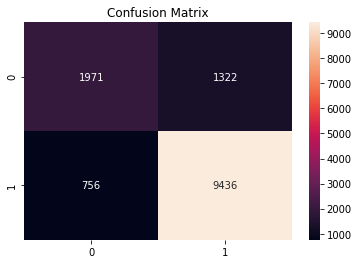

In [70]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [71]:
print(metrics.classification_report(y_test, y_test_pred))

# Number of features = 80

              precision    recall  f1-score   support

           0       0.72      0.60      0.65      3293
           1       0.88      0.93      0.90     10192

    accuracy                           0.85     13485
   macro avg       0.80      0.76      0.78     13485
weighted avg       0.84      0.85      0.84     13485



In [72]:
prob = clf_logit.predict_proba(X_test)
prob = prob[:, 1]
roc_auc = metrics.roc_auc_score(y_test, prob)
print(roc_auc)

0.9028622807715905


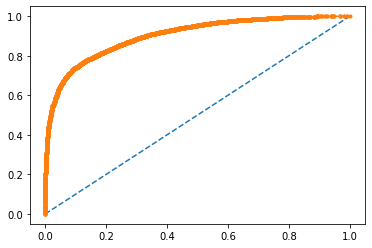

In [73]:
# ploting roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Feature Elimination using RFE

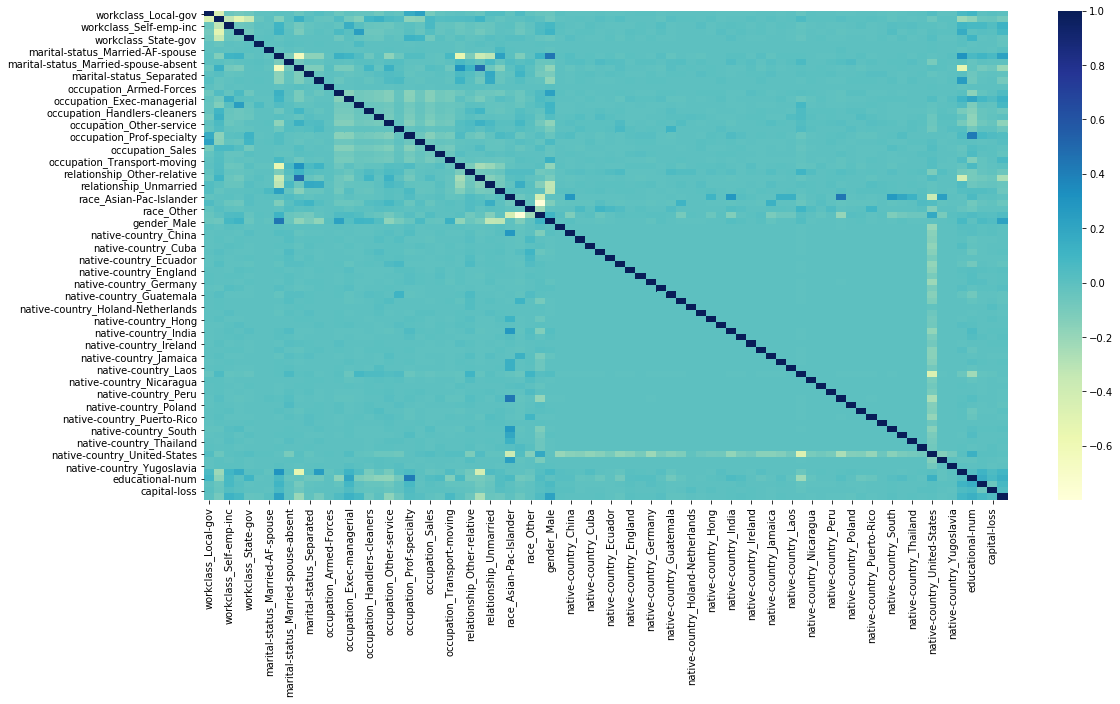

In [74]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train.corr(), cmap="YlGnBu")

In [75]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

clf_logit_rfe = LogisticRegression()

rfe = RFE(clf_logit_rfe)
rfe = rfe.fit(X_train, y_train)

In [76]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})

temp_df.loc[temp_df.Included == True, :]

,Columns,Included,Ranking
3,workclass_Self-emp-not-inc,True,1
5,workclass_Without-pay,True,1
6,marital-status_Married-AF-spouse,True,1
7,marital-status_Married-civ-spouse,True,1
9,marital-status_Never-married,True,1
14,occupation_Exec-managerial,True,1
15,occupation_Farming-fishing,True,1
16,occupation_Handlers-cleaners,True,1
17,occupation_Machine-op-inspct,True,1
18,occupation_Other-service,True,1


In [77]:
X_train_cols = list(X_train.columns[rfe.support_])

In [78]:
len(X_train_cols)

40

In [79]:
X_train_rfe = X_train[X_train_cols]

X_train_rfe.shape

(31462, 40)

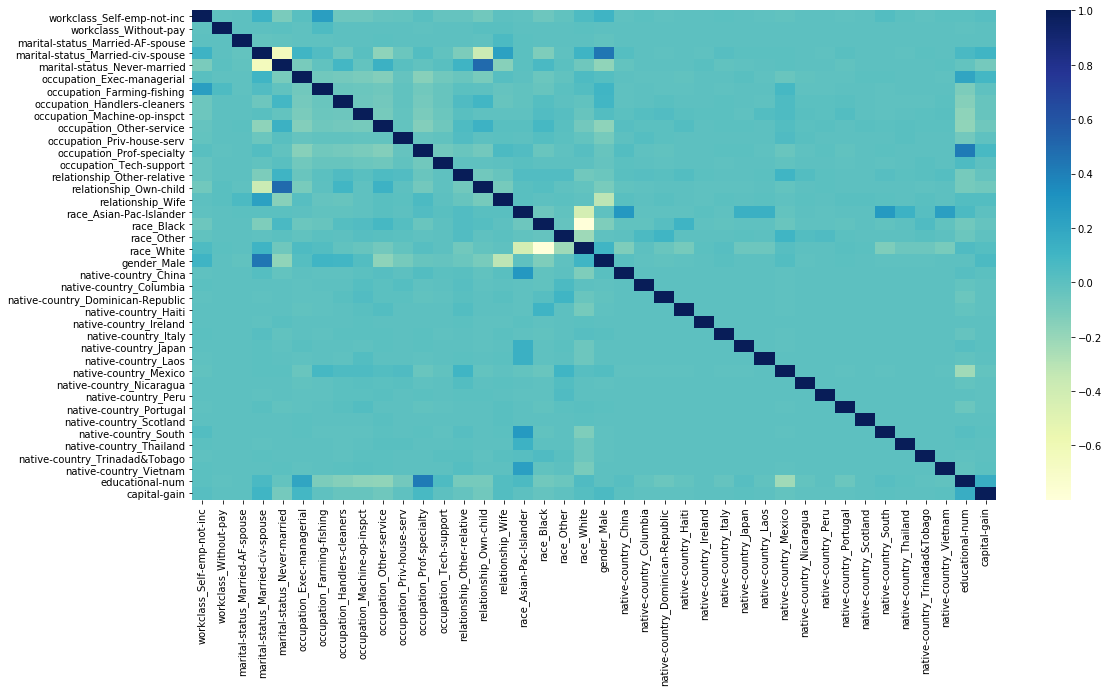

In [80]:
plt.figure(figsize=(18, 9))
sns.heatmap(X_train_rfe.corr(), cmap="YlGnBu")

In [81]:
clf_logit_rfe.fit(X_train_rfe, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
X_test_rfe = X_test[X_train_cols]

In [83]:
y_test_pred_rfe = clf_logit_rfe.predict(X_test_rfe)

In [84]:
metrics.accuracy_score(y_test, y_test_pred_rfe)

0.8388579903596589

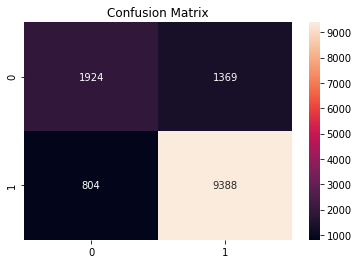

In [85]:
sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_rfe), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [86]:
print(metrics.classification_report(y_test, y_test_pred_rfe))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64      3293
           1       0.87      0.92      0.90     10192

    accuracy                           0.84     13485
   macro avg       0.79      0.75      0.77     13485
weighted avg       0.83      0.84      0.83     13485



In [87]:
prob_rfe = clf_logit_rfe.predict_proba(X_test_rfe)
prob_rfe = prob_rfe[:, 1]
roc_auc_rfe = metrics.roc_auc_score(y_test, prob_rfe)
print(roc_auc_rfe)

0.8906909297158094


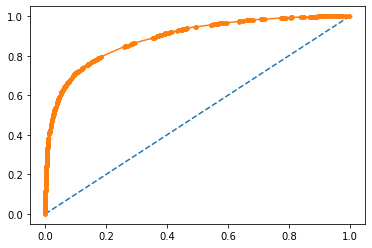

In [88]:
# ploting roc curve
fpr_rfe, tpr_rfe, thresholds_rfe = metrics.roc_curve(y_test, prob_rfe)

plt.plot([0, 1], [0, 1], linestyle='--')

# Plot the roc curve for the model
plt.plot(fpr_rfe, tpr_rfe, marker='.')
plt.show()

## Principal Component Analysis

In [89]:
X_train.shape

(31462, 80)

In [90]:
X_train.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num,capital-gain,capital-loss,hours-per-week
15746,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.558965,-0.429107,-0.233823,-0.218777,-0.077287
16255,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.342053,1.530621,-0.233823,4.471102,0.756739
10648,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,-0.950639,-0.429107,-0.233823,-0.218777,0.339726
42978,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.798297,-0.429107,-0.233823,4.471102,-0.077287
33299,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0.266012,1.530621,-0.233823,-0.218777,1.590766


In [91]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [92]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

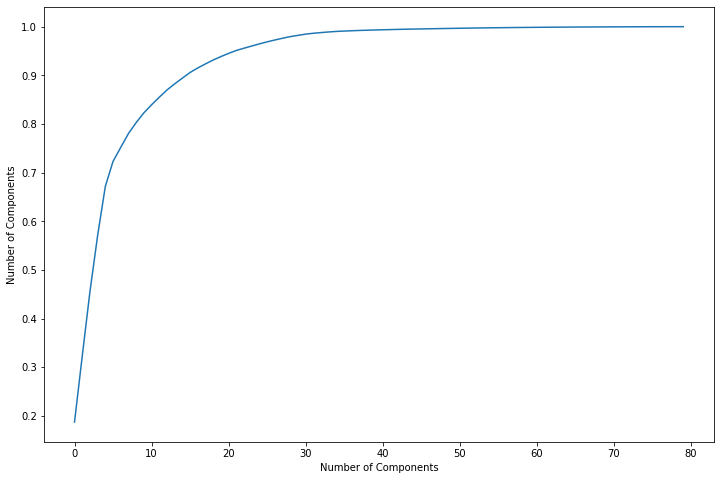

In [93]:
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Number of Components')
plt.show()

In [94]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18722203, 0.32231882, 0.45504069, 0.57063249, 0.67182221,
       0.72308951, 0.7518845 , 0.78025309, 0.80281183, 0.82286479,
       0.83946546, 0.85497868, 0.86985327, 0.88253639, 0.89424972,
       0.90591053, 0.91519254, 0.92354832, 0.93151151, 0.93858634,
       0.9451296 , 0.95110789, 0.95579698, 0.96026862, 0.96466487,
       0.96884178, 0.97263534, 0.97626336, 0.97957174, 0.98215222,
       0.9847101 , 0.98647251, 0.98786231, 0.98917474, 0.99028193,
       0.99099349, 0.99167173, 0.99225701, 0.99277323, 0.99322593,
       0.99365635, 0.99405854, 0.99445152, 0.99480917, 0.99511288,
       0.99541467, 0.99570138, 0.99598516, 0.99625011, 0.99651405,
       0.99677008, 0.99702274, 0.99725743, 0.99748396, 0.99769347,
       0.99789404, 0.99808138, 0.99825681, 0.99841304, 0.99855837,
       0.99869231, 0.99881639, 0.99893679, 0.99905485, 0.99916898,
       0.99925779, 0.99934187, 0.99942116, 0.99949616, 0.99957029,
       0.99963799, 0.99970268, 0.99976386, 0.99982327, 0.99988

In [95]:
from sklearn.decomposition import PCA

pca_final = PCA(n_components = 15, random_state = 0)

X_train_pca = pca_final.fit_transform(X_train)

In [96]:
X_train_pca.shape

(31462, 15)

In [97]:
corrmat = np.corrcoef(X_train_pca.T)

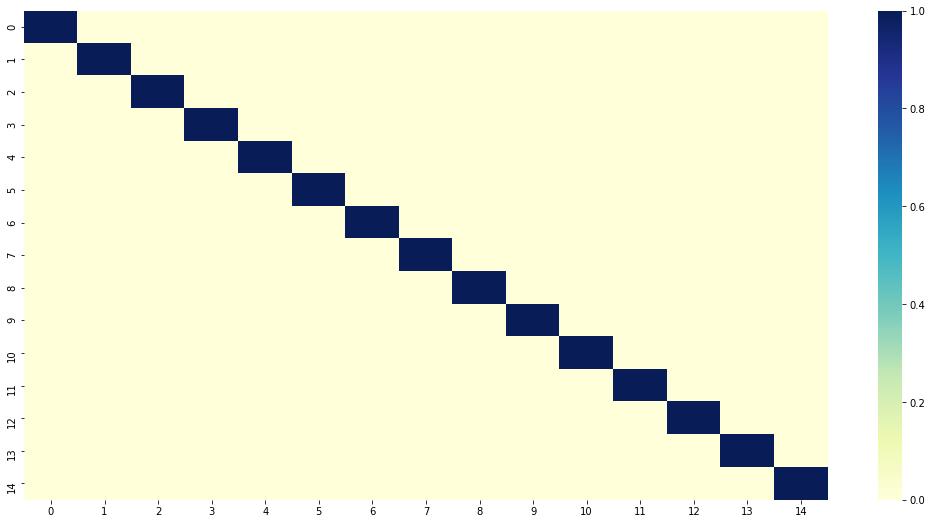

In [98]:
plt.figure(figsize=(18, 9))
sns.heatmap(corrmat, cmap="YlGnBu")

In [99]:
X_test.head()

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,educational-num,capital-gain,capital-loss,hours-per-week
24228,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.635006,-1.604944,-0.233823,-0.218777,-2.579366
17272,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0.189971,0.354784,-0.233823,-0.218777,-0.077287
23856,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.266012,0.354784,-0.233823,-0.218777,0.756739
30585,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,-1.254802,-1.604944,-0.233823,4.125895,-1.328327
30076,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0.189971,-0.037161,-0.233823,-0.218777,0.756739


In [100]:
X_test_pca = pca_final.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [102]:
clf_logit_pca = LogisticRegression()
clf_tree_pca = DecisionTreeClassifier()
clf_svm_pca = SVC(probability = True)

In [103]:
classifiers = ['LogisticRegression', 'DecisionTreeClassifier', 'SVC']

In [104]:
models = {clf_logit_pca: 'LogisticRegression', 
          clf_tree_pca: 'DecisionTreeClassifier', 
          clf_svm_pca: 'SVC'}

In [105]:
def train(algo, name, X_train_pca, y_train, X_test_pca, y_test):
    algo.fit(X_train_pca, y_train)
    y_test_pred_pca = algo.predict(X_test_pca)
    return y_test_pred_pca


def performance(algo, name, X_test, y_test, y_test_pred_pca):
    # Accuracy Score
    score = metrics.accuracy_score(y_test, y_test_pred_pca)
    print('Accuracy score for', name, ':', score)
    
    # Confusion Metrics
    sns.heatmap(metrics.confusion_matrix(y_test, y_test_pred_pca), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print(metrics.classification_report(y_test, y_test_pred_pca))
    
    # ROC AUC Score
    prob_pca = algo.predict_proba(X_test_pca)
    prob_pca = prob_pca[:, 1]
    roc_auc_pca = metrics.roc_auc_score(y_test, prob_pca)
    print(roc_auc_pca)
    
    # Plotting ROC Curve
    fpr_pca, tpr_pca, thresholds_pca = metrics.roc_curve(y_test, prob_pca)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr_pca, tpr_pca, marker='.')
    plt.show()
    
    return roc_auc_pca


def main(models):
    auc = []
    for algo, name in models.items():
        print('#'*40, name, '#'*40)
        y_test_pred_pca = train(algo, name, X_train_pca, y_train, X_test_pca, y_test)
        roc_auc_pca = performance(algo, name, X_test, y_test, y_test_pred_pca)
        auc.append(roc_auc_pca)
    return auc

######################################## LogisticRegression ########################################
Accuracy score for LogisticRegression : 0.8407860585836114


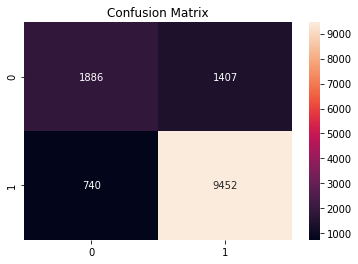

              precision    recall  f1-score   support

           0       0.72      0.57      0.64      3293
           1       0.87      0.93      0.90     10192

    accuracy                           0.84     13485
   macro avg       0.79      0.75      0.77     13485
weighted avg       0.83      0.84      0.83     13485

0.8952618977699234


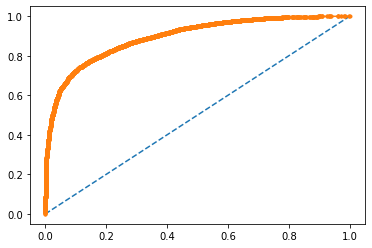

######################################## DecisionTreeClassifier ########################################
Accuracy score for DecisionTreeClassifier : 0.7980719317760474


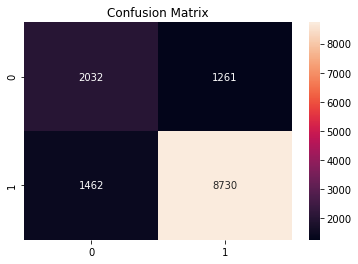

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      3293
           1       0.87      0.86      0.87     10192

    accuracy                           0.80     13485
   macro avg       0.73      0.74      0.73     13485
weighted avg       0.80      0.80      0.80     13485

0.7514916160582292


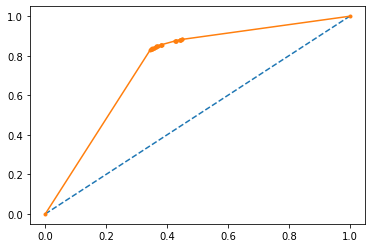

######################################## SVC ########################################
Accuracy score for SVC : 0.8492398961809418


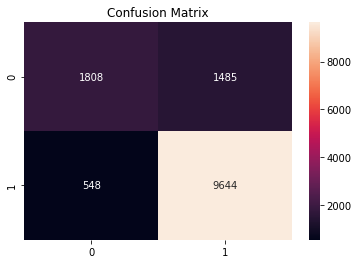

              precision    recall  f1-score   support

           0       0.77      0.55      0.64      3293
           1       0.87      0.95      0.90     10192

    accuracy                           0.85     13485
   macro avg       0.82      0.75      0.77     13485
weighted avg       0.84      0.85      0.84     13485

0.883846827817534


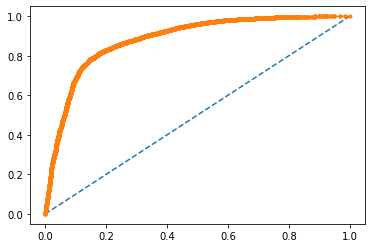

In [111]:
auc = main(models)

In [107]:
model_comp_df = pd.DataFrame(auc, columns = ['ROC AUC'], index = classifiers)

model_comp_df

,ROC AUC
LogisticRegression,0.895262
DecisionTreeClassifier,0.751206
SVC,0.883841
